## Bank Churn Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.drop(['customer_id'],axis=1,inplace=True)

In [7]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.corr()

C:\Users\srava\AppData\Local\Temp\ipykernel_37996\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [9]:
df.drop(['products_number'],axis=1,inplace=True)

In [10]:
df.isnull().sum()
df

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,1,0,113931.57,1
3,699,France,Female,39,1,0.00,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,1,0,92888.52,1


In [12]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [13]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df1=pd.get_dummies(df['country'])
df1

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [15]:
df=pd.concat([df, df1], axis=1)
df

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,1,0,96270.64,0,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,101699.77,0,1,0,0
9997,709,France,Female,36,7,0.00,0,1,42085.58,1,1,0,0
9998,772,Germany,Male,42,3,75075.31,1,0,92888.52,1,0,1,0


In [16]:
df.drop(['country'], axis=1, inplace=True)

In [17]:
df

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,1,0,92888.52,1,0,1,0


In [18]:
df.dtypes

credit_score          int64
gender               object
age                   int64
tenure                int64
balance             float64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
France                uint8
Germany               uint8
Spain                 uint8
dtype: object

In [19]:
df2=pd.get_dummies(df['gender'])
df2

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [20]:
df=pd.concat([df, df2], axis=1)
df

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
0,619,Female,42,2,0.00,1,1,101348.88,1,1,0,0,1,0
1,608,Female,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0
2,502,Female,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0
3,699,Female,39,1,0.00,0,0,93826.63,0,1,0,0,1,0
4,850,Female,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,1,0,96270.64,0,1,0,0,0,1
9996,516,Male,35,10,57369.61,1,1,101699.77,0,1,0,0,0,1
9997,709,Female,36,7,0.00,0,1,42085.58,1,1,0,0,1,0
9998,772,Male,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1


In [21]:
df.drop(['gender'],axis=1,inplace=True)

In [22]:
df

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1


#### checking whether there are any outliers present in the dataset

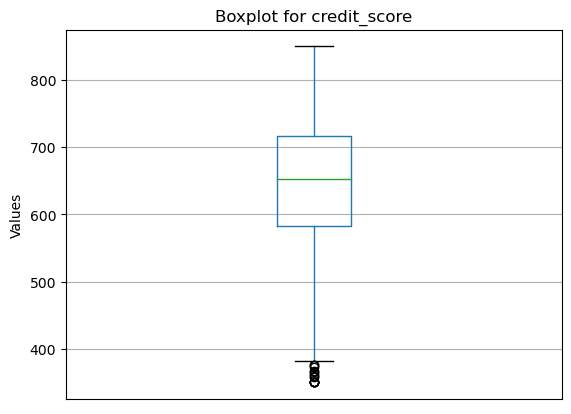

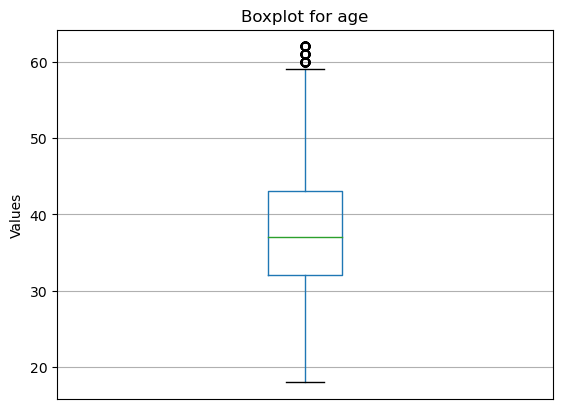

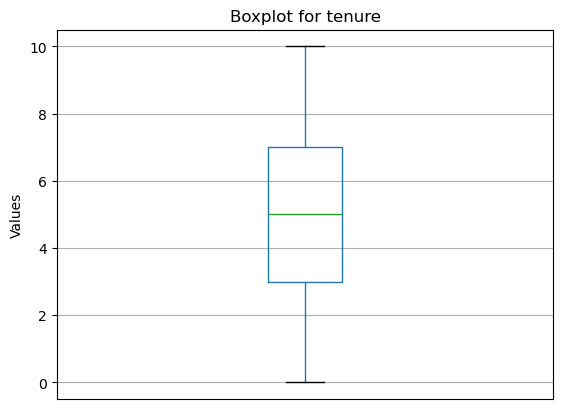

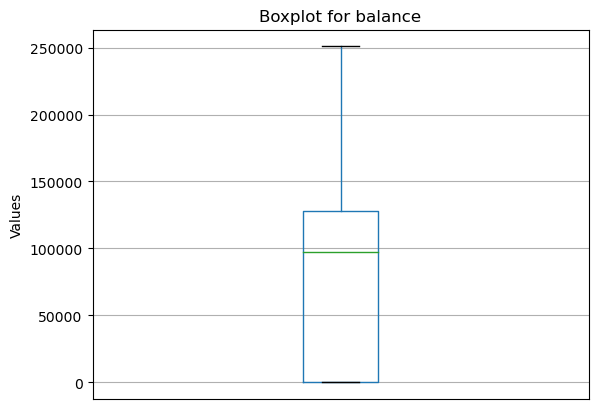

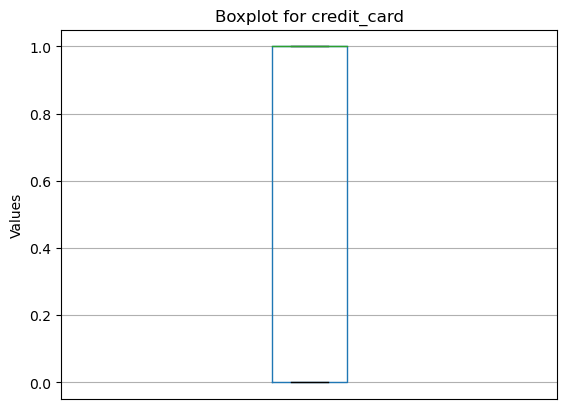

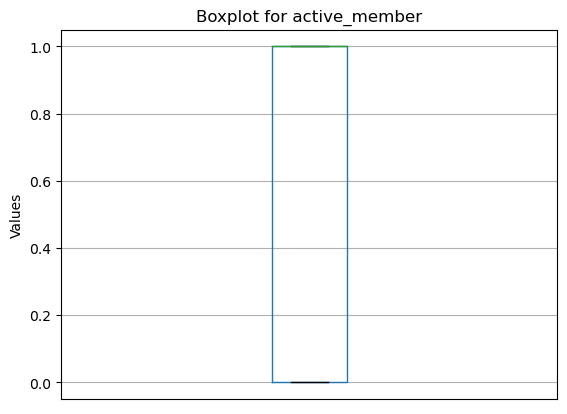

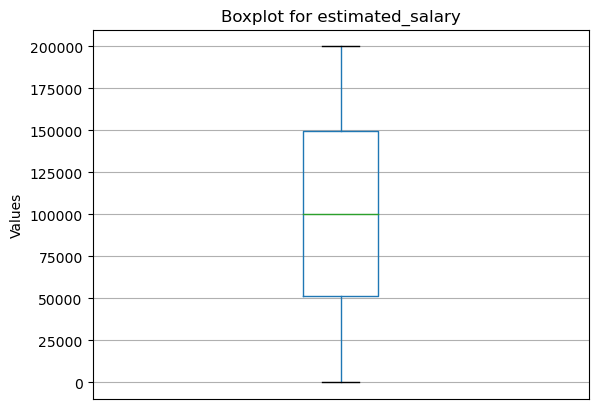

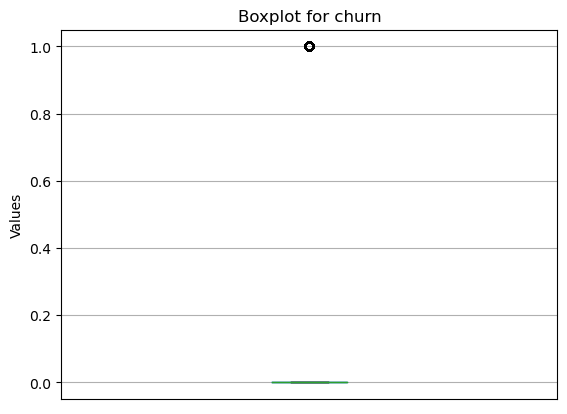

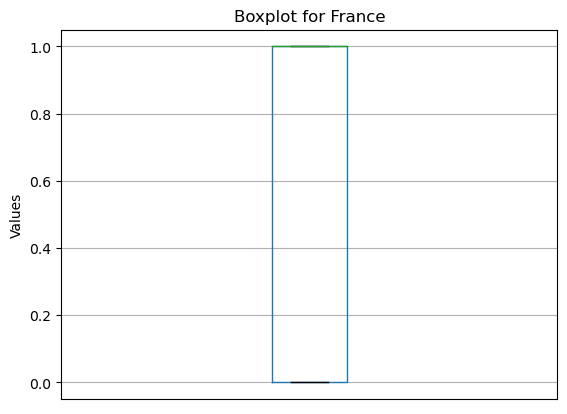

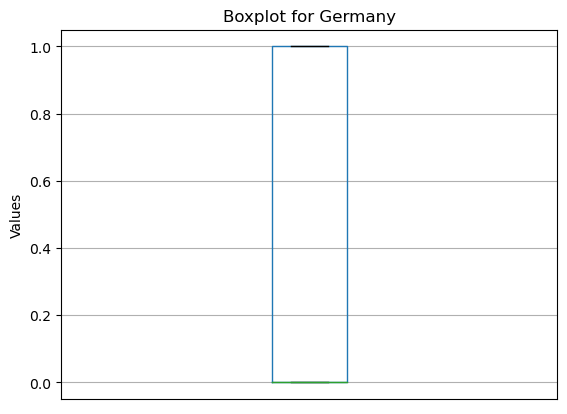

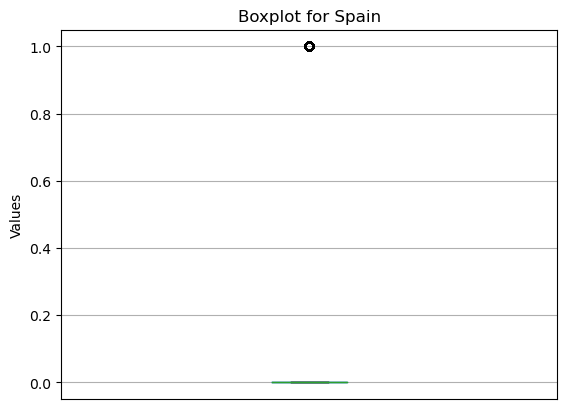

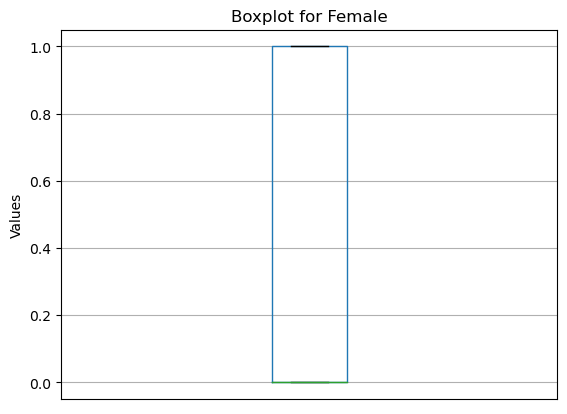

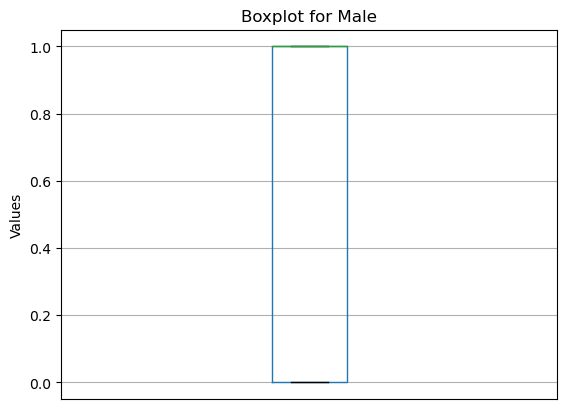

In [41]:
for column in df.columns:
    plt.figure()  # Create a new figure for each boxplot
    df.boxplot(column=[column])  # Plot boxplot for the current column
    plt.title(f'Boxplot for {column}')  # Set title for the boxplot
    plt.ylabel('Values')  # Set label for y-axis
    plt.xticks([])  # Remove x-axis ticks
    plt.show()
    

In [42]:
#Interquartile range is used to remove the outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_outliers_removed

In [44]:
df=remove_outliers_iqr(df,column="age")

<AxesSubplot:>

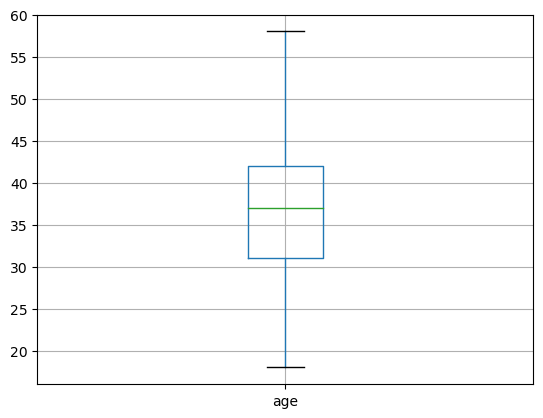

In [45]:
df.boxplot(column="age")

In [46]:
X=df.drop(['churn'], axis=1)
y=df['churn']

In [47]:
X,y

(      credit_score  age  tenure    balance  credit_card  active_member  \
 0              619   42       2       0.00            1              1   
 1              608   41       1   83807.86            0              1   
 2              502   42       8  159660.80            1              0   
 3              699   39       1       0.00            0              0   
 4              850   43       2  125510.82            1              1   
 ...            ...  ...     ...        ...          ...            ...   
 9995           771   39       5       0.00            1              0   
 9996           516   35      10   57369.61            1              1   
 9997           709   36       7       0.00            0              1   
 9998           772   42       3   75075.31            1              0   
 9999           792   28       4  130142.79            1              0   
 
       estimated_salary  France  Germany  Spain  Female  Male  
 0            101348.88       1   

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred=model.predict(X_test)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
pd.DataFrame(y_pred).value_counts()

0    2706
1     118
dtype: int64

In [53]:
print(type(y_test))
y_test=np.array(y_test)

<class 'pandas.core.series.Series'>


In [54]:
y_test.shape

(2824,)

In [55]:
c=0
for i in range(len(list(y_test))):
    if y_test[i]==y_pred[i]:
        c=c+1
print(c)     

2265


In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
accuracy_score(y_pred,y_test)*100

80.20538243626062

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      2706
           1       0.12      0.59      0.20       118

    accuracy                           0.80      2824
   macro avg       0.55      0.70      0.54      2824
weighted avg       0.94      0.80      0.86      2824



<AxesSubplot:ylabel='Count'>

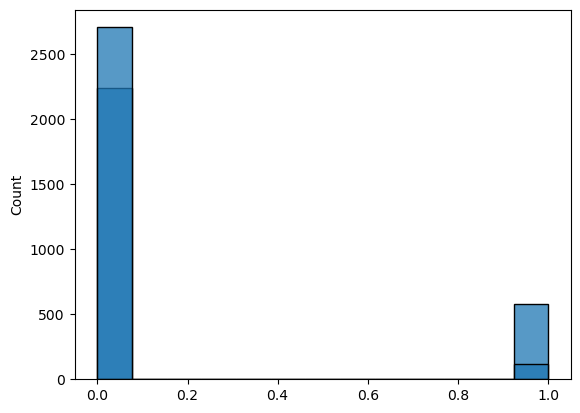

In [60]:
sns.histplot(y_test)
sns.histplot(y_pred)

### Scaling the dataset

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [62]:
model.fit(X_train,y_train)
m1=model.score(X_test,y_test)
m1*100

82.68413597733712

### Training with the other models

In [75]:
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [76]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [79]:
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

82.22379603399433
[[2206   37]
 [ 465  116]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2243
           1       0.76      0.20      0.32       581

    accuracy                           0.82      2824
   macro avg       0.79      0.59      0.61      2824
weighted avg       0.81      0.82      0.78      2824



In [80]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred1=clf.predict(X_test)

In [86]:
print(accuracy_score(y_test,pred1)*100)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

82.22379603399433
[[2206   37]
 [ 465  116]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2243
           1       0.76      0.20      0.32       581

    accuracy                           0.82      2824
   macro avg       0.79      0.59      0.61      2824
weighted avg       0.81      0.82      0.78      2824



In [88]:
xg=xgb.XGBClassifier()
xg.fit(X_train,y_train)
pred2=xg.predict(X_test)

In [90]:
print(accuracy_score(y_test,pred2)*100)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

81.40934844192634
[[2117  126]
 [ 399  182]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2243
           1       0.59      0.31      0.41       581

    accuracy                           0.81      2824
   macro avg       0.72      0.63      0.65      2824
weighted avg       0.79      0.81      0.79      2824



### Hyperparameter tuning with the RandomizedSearchCV for randomforest

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [100]:
n_estimators=[int(x) for x in np.linspace(20,2000,10)]
max_features = ['auto', 'sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
# min_samples_split=[2,4,6,8,10]
# min_samples_leaf=[3,6,7,8,9,12]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':randint(2, 10),
               'min_samples_leaf': randint(2, 10),
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [20, 240, 460, 680, 900, 1120, 1340, 1560, 1780, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE2D9B1C10>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE2C4CAEE0>, 'criterion': ['entropy', 'gini']}


In [102]:
rf=RandomForestClassifier()
rsv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
### fit the randomized model
rsv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE2C4CAEE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE2D9B1C10>,
                                        'n_estimators': [20, 240, 460, 680, 900,
                                                         1120, 1340, 1560, 1780,
                                                         2000]},
                   random_state=42, verbose=2)

In [104]:
rsv.best_params_

{'criterion': 'gini',
 'max_depth': 340,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 460}

In [109]:
r1=rsv.best_estimator_

In [112]:
pred4=r1.predict(X_test)
print(confusion_matrix(y_test,pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,pred4)*100))
print("Classification report: {}".format(classification_report(y_test,pred4)))

[[2161   82]
 [ 411  170]]
Accuracy Score 82.54249291784703
Classification report:               precision    recall  f1-score   support

           0       0.84      0.96      0.90      2243
           1       0.67      0.29      0.41       581

    accuracy                           0.83      2824
   macro avg       0.76      0.63      0.65      2824
weighted avg       0.81      0.83      0.80      2824



### GridSearchCV

In [113]:
rsv.best_estimator_

RandomForestClassifier(max_depth=340, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=460)

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rsv.best_params_['criterion']],
    'max_depth': [rsv.best_params_['max_depth']],
    'max_features': [rsv.best_params_['max_features']],
    'min_samples_leaf': [rsv.best_params_['min_samples_leaf'], 
                         rsv.best_params_['min_samples_leaf']+2, 
                         rsv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rsv.best_params_['min_samples_split'], 
                          rsv.best_params_['min_samples_split'] +1,
                          rsv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rsv.best_params_['n_estimators'] - 200, rsv.best_params_['n_estimators'] - 100, 
                     rsv.best_params_['n_estimators'], 
                     rsv.best_params_['n_estimators'] + 100, rsv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [340], 'max_features': ['sqrt'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [3, 4, 5], 'n_estimators': [260, 360, 460, 560, 660]}


In [117]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [340],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [260, 360, 460, 560, 660]},
             verbose=2)

In [119]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=340, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=260)

In [122]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[2165   78]
 [ 414  167]]
Accuracy Score 0.8257790368271954
Classification report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2243
           1       0.68      0.29      0.40       581

    accuracy                           0.83      2824
   macro avg       0.76      0.63      0.65      2824
weighted avg       0.81      0.83      0.80      2824



In [126]:
y_pred=pd.DataFrame(y_pred)

<AxesSubplot:ylabel='Count'>

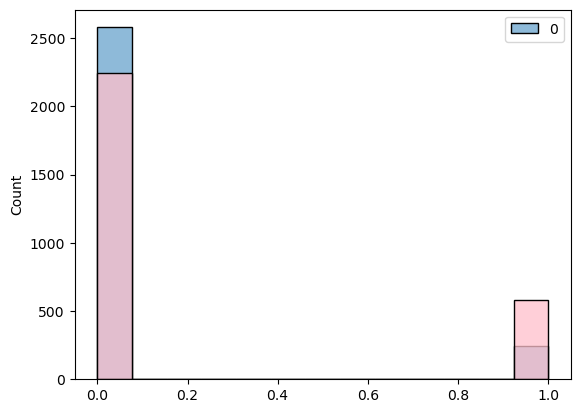

In [130]:
sns.histplot(y_pred,color='blue')
sns.histplot(y_test,color='pink')